In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Convolutions and basics of CNNs

> How convolutions work

In [13]:
from exp.nb_07 import *
from PIL import Image
import numpy as np

## Data

Let's grab out MNIST dataset.

In [3]:
x_train, y_train, x_valid, y_valid = get_data()

In [6]:
x_train.shape

torch.Size([50000, 784])

Each row of the dataset is an image, 

In [5]:
x_train[0].shape

torch.Size([784])

But in order to properly view them we'll reshape them for now into rank 3 tensors:

`[channels, height, width]`


In [8]:
x_train = x_train.view(-1, 28,28)

In [11]:
five = x_train[0]

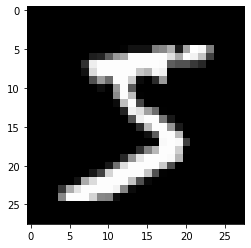

In [12]:
plt.imshow(five)

## Convolutions

## Kernel from Scratch

Let's try to create a top edge detection kernel from scratch and convolve it over the image.

In [16]:
k = tensor([
    [1.,1.,1.],
    [-1.,-1.,-1.,],
    [0.,0.,0.]
]); k.shape

torch.Size([3, 3])

Pytorch `F.conv2d` requires `[batch size, channels, height, width]` so we'll reshape using `view`

Then we can pass it into our `nn.Conv2d` with our kernel and since the `stride=1` the result will be a rank 3 tensor 

`[filters, channels, height, width]'

In [19]:
top = F.conv2d(five.view(1,1,28,28), k[None, None])

In [29]:
top.shape

torch.Size([1, 1, 26, 26])

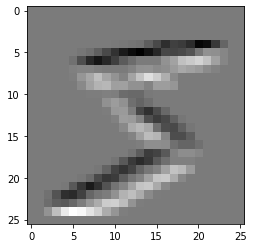

In [21]:
plt.imshow(top.squeeze())

And if we transpose our kernel it looks like it will detect edges on the leftside of an object. 

In [23]:
k.t()

tensor([[ 1., -1.,  0.],
        [ 1., -1.,  0.],
        [ 1., -1.,  0.]])

In [27]:
left = F.conv2d(five.view(1,1,28,28), k.t()[None, None])

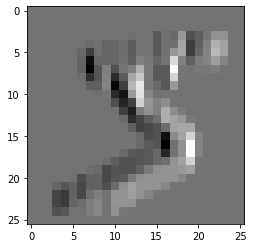

In [28]:
plt.imshow(left.squeeze())

So how do this basic 

### Adaptive Average Max Pool

`F.adaptive_avg_pool2d`

    Applies a 2D adaptive average pooling over an input signal composed of several input planes.

In [ ]:
avg_pool_1d = F.adaptive_avg_pool2d(feature_map, 1); avg_pool_1d.shape

In [ ]:
feature_map.squeeze().view(-1).mean()

In [ ]:
avg_pool_1d.squeeze()

### Adaptive Max Pool

F.adaptive_max_pool2d

    Applies a 2D adaptive max pooling over an input signal composed of several input planes.
    
Max pooling will return a tensor of the max of some specified shape. 

In [ ]:
max_pool = F.adaptive_max_pool2d(feature_map, 1); max_pool.shape

In [ ]:
feature_map.squeeze().view(-1).max()

In [ ]:
max_pool.squeeze()

## Pre-Trained Model

Let's look at the activations of a pretrained model. 

In [ ]:
from fastai.vision import *

In [ ]:
model = models.resnet34(pretrained=True)

To pass an image we need to: normalize, turn into a mini-batch, and put onto GPU

__Resources__
- https://distill.pub/2017/feature-visualization/
- https://brohrer.github.io/how_convolutional_neural_networks_work.html
- http://www.cs.cornell.edu/courses/cs1114/2013sp/sections/S06_convolution.pdf
- https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md
- https://openframeworks.cc/ofBook/chapters/image_processing_computer_vision.html
- https://medium.com/impactai/cnns-from-different-viewpoints-fab7f52d159c